# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import json
import ast
import seaborn as sns
import os

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# Settings

In [3]:
class config:
    data_dir = '../OpenVaccine/'
    train_file = '../OpenVaccine/train.json'
    test_file = '../OpenVaccine/test.json'
    sample_submission = '../OpenVaccine/sample_submission.csv'

In [4]:
train = pd.read_json(config.train_file, lines=True)
test = pd.read_json(config.test_file, lines=True)
sub = pd.read_csv(config.sample_submission)

In [5]:
train.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [6]:
test.head()

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [7]:
sub.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.0,0.0,0.0,0.0,0.0
1,id_00073f8be_1,0.0,0.0,0.0,0.0,0.0
2,id_00073f8be_2,0.0,0.0,0.0,0.0,0.0
3,id_00073f8be_3,0.0,0.0,0.0,0.0,0.0
4,id_00073f8be_4,0.0,0.0,0.0,0.0,0.0


In [8]:
pred_cols = ['reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C']

In [24]:
np.array(train[pred_cols].values.tolist()).transpose((0, 2, 1)).dtype

dtype('float64')

In [10]:
train.shape

(2400, 19)

In [16]:
def get_couples(structure):
    """
    For each closing parenthesis, I find the matching opening one and store their index in the couples list.
    The assigned list is used to keep track of the assigned opening parenthesis
    """
    opened = [idx for idx, i in enumerate(structure) if i == '(']
    closed = [idx for idx, i in enumerate(structure) if i == ')']

    assert len(opened) == len(closed)
    assigned = []
    couples = []

    for close_idx in closed:
        for open_idx in opened:
            if open_idx < close_idx:
                if open_idx not in assigned:
                    candidate = open_idx
            else:
                break
        assigned.append(candidate)
        couples.append([candidate, close_idx])
        
    assert len(couples) == len(opened)
    
    return couples

def build_matrix(couples, size):
    mat = np.zeros((size, size))
    
    for i in range(size):  # neigbouring bases are linked as well
        if i < size - 1:
            mat[i, i + 1] = 1
        if i > 0:
            mat[i, i - 1] = 1
    
    for i, j in couples:
        mat[i, j] = 1
        mat[j, i] = 1
        
    return mat

def convert_to_adj(structure):
    couples = get_couples(structure)
    mat = build_matrix(couples, len(structure))
    return mat

In [23]:
np.array(train['structure'].apply(convert_to_adj).values.tolist()).shape

(2400, 107, 107)

# Split Kfold

In [26]:
train.SN_filter.value_counts()

1    1589
0     811
Name: SN_filter, dtype: int64

In [34]:
splits = StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(train['id'], train['SN_filter'])

for train_index, test_index in splits:
    print(train['SN_filter'][train_index].value_counts())

1    1271
0     649
Name: SN_filter, dtype: int64
1    1271
0     649
Name: SN_filter, dtype: int64
1    1271
0     649
Name: SN_filter, dtype: int64
1    1271
0     649
Name: SN_filter, dtype: int64
1    1272
0     648
Name: SN_filter, dtype: int64


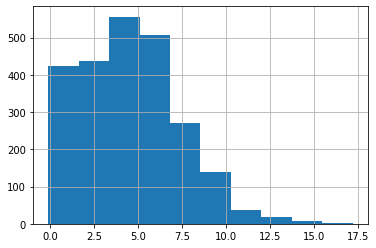

In [36]:
train['signal_to_noise'].hist()

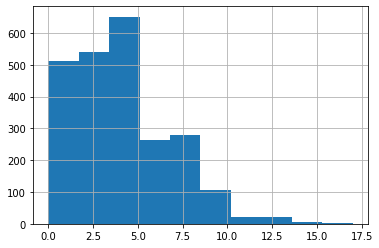

In [42]:
train['signal_to_noise'].apply(lambda x: int(x)).hist()

# Test filter

In [53]:
sn_filter_ids = set(train[train['SN_filter'] == 1].id.values)

In [47]:
def sample_is_clean(row):
    return row['signal_to_noise'] > 1 and \
           min((min(row['reactivity']),
                min(row['deg_Mg_pH10']),
                min(row['deg_pH10']),
                min(row['deg_Mg_50C']),
                min(row['deg_50C']))) > -0.5

In [54]:
signal_to_noise_id = set(train[train.apply(sample_is_clean, axis=1)].id.values)

In [55]:
len(sn_filter_ids)

1589

In [56]:
len(set.intersection(sn_filter_ids, signal_to_noise_id))

1587

In [57]:
len(signal_to_noise_id)

1610

# Pseudo Labeling

In [19]:
sub_df = pd.read_csv('/home/thinh/OpenVaccine/best_submissions.csv')
sub_df.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.742317,0.631828,1.760950,0.542213,0.717547
1,id_00073f8be_1,2.181780,3.076070,3.824489,3.073798,2.522074
2,id_00073f8be_2,1.605017,0.634185,0.691408,0.763068,0.675371
3,id_00073f8be_3,1.303646,1.081856,1.099929,1.588297,1.591309
4,id_00073f8be_4,0.798068,0.574595,0.480866,0.846659,0.790893


In [20]:
sub_df['id'] = sub_df['id_seqpos'].apply(lambda x: "_".join(x.split('_')[0:-1]))

In [21]:
sub_df = sub_df.groupby('id').agg(lambda x: list(x))

In [25]:
sub_df = sub_df.drop('id_seqpos', axis=1)

In [30]:
sub_df = sub_df.reset_index()

In [31]:
sub_df.head()

,id,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be,"[0.7423171173507644, 2.181780037625293, 1.6050...","[0.6318282140059103, 3.076069759823652, 0.6341...","[1.7609497729935149, 3.8244891912216223, 0.691...","[0.5422129095558461, 3.0737975074002937, 0.763...","[0.7175472462743623, 2.5220742010763484, 0.675..."
1,id_000ae4237,"[0.5988852160599594, 1.252383497027623, 1.1766...","[0.5802506685595211, 1.9965426237137536, 0.765...","[1.6855349656016847, 1.9856331898502928, 0.841...","[0.4643303444983725, 1.7353359778870612, 0.980...","[0.5961263638596626, 1.330144615692037, 0.9792..."
2,id_00131c573,"[0.5053424451042973, 1.397678539326762, 1.3428...","[0.6480476282563574, 1.8574288513316863, 0.799...","[2.0296174579208097, 2.978387602750781, 1.0915...","[0.5307729190603219, 1.8657089315454944, 1.051...","[0.6587041099047181, 1.8361675185649813, 0.927..."
3,id_00181fd34,"[0.6635891060515464, 1.5968415858992682, 1.462...","[0.6671735175391018, 1.7476366061505602, 1.157...","[1.831126684324306, 2.3165765487449046, 1.2180...","[0.5232022821655801, 1.6036999633440474, 1.581...","[0.6676492768025523, 1.5654249835216838, 1.360..."
4,id_0020473f7,"[0.751697894404419, 1.8868896799083001, 1.3745...","[0.7895877059930309, 2.8275117665075093, 0.935...","[1.467933834294549, 2.6756719629474697, 1.0947...","[0.5991996450286899, 2.477975121643563, 1.2246...","[0.5419860902101901, 1.5332587823832124, 1.105..."


In [33]:
pseudo_df = pd.merge(test, sub_df, on='id')

In [36]:
pseudo_df.to_csv('/home/thinh/OpenVaccine/pseudo_test.csv', index=False)